# Análise exploratória dados de issues de atendimento

Importe de bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Preparação dos dados

Ler o aquivo CSV

In [2]:
df_tag = pd.read_csv('de_para_tag_hierarquia.csv')
df_issue  = pd.read_csv('issues_atendimento_.csv')

Visualiazação dos arquivos importados 

In [3]:
df_issue.head()

,dt_data,id_cliente,id_issue,canal,tag
0,2024-10-07 17:32:50.000,22df4146-1b0b-42e1-bc64-1905e921a56a-765gh,8095572,chat,w3 - reclamacao - resultado analise de contest...
1,2024-12-03 19:09:43.000,019226ac-f859-7590-9cfe-56d56f5e8f59-765gh,9872055,chat,w3 - reclamacao - resultado analise de contest...
2,2024-10-16 18:26:47.000,c73c1daa-efd4-4a07-9671-1e52fb008601-765gh,8428710,chat,w3 - duvida - pix no credito
3,2024-12-12 15:34:49.000,01923e84-7191-7bf0-bd29-0aeb1417f4e1-765gh,10153733,chat,w3 - problema - desacordo comercial
4,2024-12-05 12:37:52.000,881b24fc-23d1-4dd3-80ab-00f636cecdfa-765gh,9934026,chat,wb-caf


In [4]:
df_tag.head()

,tag,ds_hierarquia_a,ds_hierarquia_b
0,w3 - solicitacao - 2 via cartao fraudado,Cartão,Segunda via cartão
1,wb-cdu,Cartão,Lançamentos duplicados
2,w3 - solicitacao - cancelar insatisfacao,Cartão,Cancelamento de conta
3,w3 - duvida - cancelamento de compra,Cartão,Cancelamento de compra no crédito
4,wb-cf,Cartão,Compensação fatura


Junção dos dados

In [5]:
df = df_issue.merge(df_tag, on='tag', how='left')

In [6]:
df.head()

,dt_data,id_cliente,id_issue,canal,tag,ds_hierarquia_a,ds_hierarquia_b
0,2024-10-07 17:32:50.000,22df4146-1b0b-42e1-bc64-1905e921a56a-765gh,8095572,chat,w3 - reclamacao - resultado analise de contest...,Fraude,Resultado análise de fraude
1,2024-12-03 19:09:43.000,019226ac-f859-7590-9cfe-56d56f5e8f59-765gh,9872055,chat,w3 - reclamacao - resultado analise de contest...,Fraude,Resultado análise de fraude
2,2024-10-16 18:26:47.000,c73c1daa-efd4-4a07-9671-1e52fb008601-765gh,8428710,chat,w3 - duvida - pix no credito,Cartão,Todos os itens de pix no crédito
3,2024-12-12 15:34:49.000,01923e84-7191-7bf0-bd29-0aeb1417f4e1-765gh,10153733,chat,w3 - problema - desacordo comercial,Cartão,Problema com compra
4,2024-12-05 12:37:52.000,881b24fc-23d1-4dd3-80ab-00f636cecdfa-765gh,9934026,chat,wb-caf,Cartão,Compensação fatura


Criação de novas colunas para enriquecimento da análise

In [7]:
# Converter a coluna dt_data em datetime para permitir a criação de colunas de detalhamento
df['dt_data'] = pd.to_datetime(df['dt_data'])

In [8]:
#criação de novas colunas
df['hora'] = df['dt_data'].dt.hour

### 1. Análise Exploratória inicial

In [9]:
print("Formato do dataset:", df.shape)
print("\nColunas disponíveis:", df.columns.tolist())

Formato do dataset: (804302, 8)

Colunas disponíveis: ['dt_data', 'id_cliente', 'id_issue', 'canal', 'tag', 'ds_hierarquia_a', 'ds_hierarquia_b', 'hora']


Informações gerais

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804302 entries, 0 to 804301
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   dt_data          804302 non-null  datetime64[ns]
 1   id_cliente       804293 non-null  object        
 2   id_issue         804302 non-null  int64         
 3   canal            804302 non-null  object        
 4   tag              804302 non-null  object        
 5   ds_hierarquia_a  804302 non-null  object        
 6   ds_hierarquia_b  804302 non-null  object        
 7   hora             804302 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 55.2+ MB


Verificar dados nulos

In [12]:
print("\nDados ausentes:")
print(df.isnull().sum())


Dados ausentes:
dt_data            0
id_cliente         9
id_issue           0
canal              0
tag                0
ds_hierarquia_a    0
ds_hierarquia_b    0
hora               0
dtype: int64


### 2. Análise Descritiva

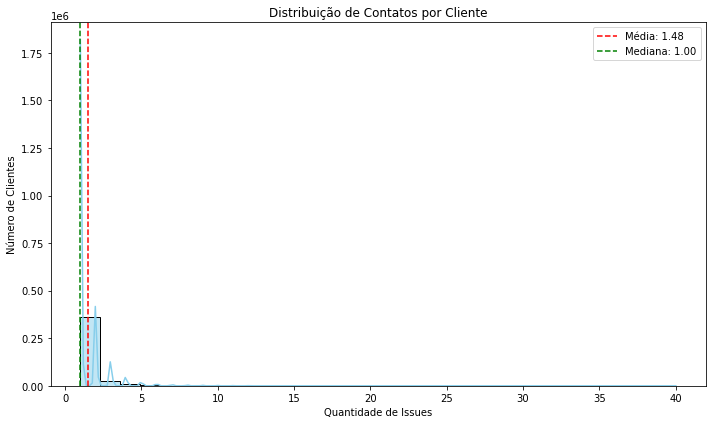

In [13]:
# Agrupar e contar quantidade de issues por cliente
contatos_por_cliente = df.groupby('id_cliente')['id_issue'].nunique().reset_index()
contatos_por_cliente.rename(columns={'id_issue': 'qtd_issues'}, inplace=True)

# Plotar histograma com linha da média e mediana
plt.figure(figsize=(10, 6))
sns.histplot(contatos_por_cliente['qtd_issues'], bins=30, kde=True, color='skyblue')

# Linhas de média e mediana
media = contatos_por_cliente['qtd_issues'].mean()
mediana = contatos_por_cliente['qtd_issues'].median()
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana:.2f}')

# Título e legendas
plt.title('Distribuição de Contatos por Cliente')
plt.xlabel('Quantidade de Issues')
plt.ylabel('Número de Clientes')
plt.legend()
plt.tight_layout()
plt.show()

O objetivo do gráfico acima é analisar a distribuição dos contatos por cliente e entender se existe uma distribuição normal ou não, é possível identificar pelo gráfico que não é aderente a distribuição normal e dessa forma a melhor análise é feita com a mediana

In [14]:
print("Mediana de contatos por cliente:", df.groupby('id_cliente')['id_issue'].nunique().median())

Mediana de contatos por cliente: 1.0


Média e mediana de contato por TAG

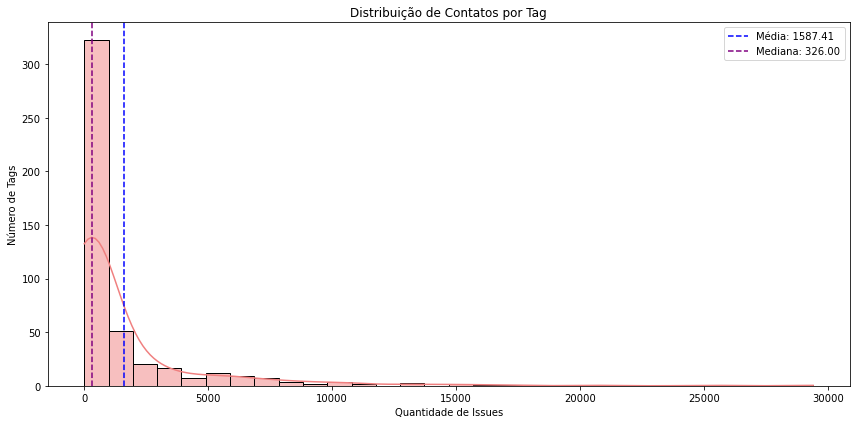

In [15]:
# Agrupar e contar quantidade de issues por tag
issues_por_tag = df.groupby('tag')['id_issue'].nunique().reset_index()
issues_por_tag.rename(columns={'id_issue': 'qtd_issues'}, inplace=True)

# Plotar histograma com linha de média e mediana
plt.figure(figsize=(12, 6))
sns.histplot(issues_por_tag['qtd_issues'], bins=30, kde=True, color='lightcoral')

# Linhas de média e mediana
media = issues_por_tag['qtd_issues'].mean()
mediana = issues_por_tag['qtd_issues'].median()
plt.axvline(media, color='blue', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(mediana, color='purple', linestyle='--', label=f'Mediana: {mediana:.2f}')

# Título e eixos
plt.title('Distribuição de Contatos por Tag')
plt.xlabel('Quantidade de Issues')
plt.ylabel('Número de Tags')
plt.legend()
plt.tight_layout()
plt.show()

Da mesma forma que o anterior, a análise por tag também não apresenta uma distribuição normal, tendo uma concentração em alguns itens. A melhor análise nesse caso, também é utilizando a mediana

In [16]:
print("Mediana de contatos por cliente:", df.groupby('tag')['id_issue'].nunique().median())

Mediana de contatos por cliente: 326.0


Distribuição das TAGs

In [17]:

tag_counts = df['tag'].value_counts()
print("\nTop 10 TAGs:")
print(tag_counts.head(10))


Top 10 TAGs:
w3 - duvida - estorno                                  34452
w3 - problema - nao reconhece compra online            29273
w3 - duvida - detalhamento de faturas                  22098
w3 - solicitacao - cancelar limite baixo               18214
w3 - duvida - nao elegivel pix credito                 17543
w3 - solicitacao - cancelar motivos pessoais           17019
w3 - reclamacao - desconhece recebimento               15760
w3 - duvida - antecipacao fatura                       14430
w3 - solicitacao - resultado analise de contestacao    14085
w3 - duvida - valor total da fatura                    13473
Name: tag, dtype: int64


In [18]:
tag_counts = df['ds_hierarquia_b'].value_counts()
print("\nTop 10 Hierarquia B:")
print(tag_counts.head(10))


Top 10 Hierarquia B:
Cancelamento de conta                      78871
Não reconhecimento de compra no crédito    66988
Cancelamento de compra no crédito          49846
Segunda via cartão                         45545
Compensação fatura                         42968
Informações sobre fatura                   40495
Desbloqueio de cartão                      26725
Todos os itens de pix no crédito           26220
Recusa de compra                           24811
Dúvidas sobre pagamento de fatura          24255
Name: ds_hierarquia_b, dtype: int64


In [19]:
tag_counts = df['ds_hierarquia_a'].value_counts()
print("\nQuantidade de contato por Hierarquia A:")
print(tag_counts.head())



Quantidade de contato por Hierarquia A:
Cartão         590063
Fraude         116093
Conta           87569
Empréstimos     10577
Name: ds_hierarquia_a, dtype: int64


Distribuição dos canais

In [20]:
canal_counts = df['canal'].value_counts()
print("\nTop canais:")
print(canal_counts)


Top canais:
chat     804296
email         6
Name: canal, dtype: int64


### 3. Criação da Flag de Recontato

Considera recontato todo cliente que entrou em contato pelo mesmo motivo (tag) dentro de 24h

In [21]:
# Ordenar por cliente, tag e data
df = df.sort_values(by=['id_cliente', 'tag', 'dt_data'])

In [22]:
# Criar uma flag de recontato
df['tempo_entre_contatos'] = df.groupby(['id_cliente', 'tag'])['dt_data'].diff().dt.total_seconds() / 3600

In [23]:
# Se o tempo entre contatos for menor ou igual a 24h, é recontato
df['flag_recontato_24h'] = np.where((df['tempo_entre_contatos'] <= 24) & (df['tempo_entre_contatos'] > 0), 1, 0)

Visualizar os dados

In [24]:
# Visualizar
df[['id_cliente', 'tag', 'dt_data', 'tempo_entre_contatos', 'flag_recontato_24h']]\
  .sort_values(by='tempo_entre_contatos', ascending=False)\
  .head(10)

,id_cliente,tag,dt_data,tempo_entre_contatos,flag_recontato_24h
689991,b9f5a7e4-01da-44a0-8847-6c2c2b3d4535-765gh,w3 - duvida - estorno,2024-12-30 07:12:55,2156.971944,0
78114,487a22ef-686f-41af-bf00-35bcc1a67520-765gh,w3 - problema - compra nao autorizada presencial,2024-12-31 10:57:58,2137.295278,0
803153,95876584-cf94-4b8e-abe6-6831f55dc68b-765gh,w3 - duvida - detalhamento de faturas,2024-12-30 17:14:07,2137.049722,0
356765,4f783ba4-aa77-424f-87fc-2223e297501a-765gh,w3 - duvida - compensacao bancaria,2024-12-30 10:18:08,2133.094167,0
716774,4f67073e-640c-4448-a0ae-8bba46d7dce2-765gh,w3 - duvida - tarifas e encargos atraso,2024-12-29 18:13:37,2097.551944,0
420664,6504253b-d2f9-489f-b2d6-72e654662b60-765gh,w3 - duvida - nao elegivel emprestimo pessoal,2024-12-28 15:21:56,2095.167778,0
347115,b7e70470-d69e-4276-8d02-302ca7c84e83-765gh,w3 - duvida - antecipacao fatura,2024-12-30 17:55:57,2092.319167,0
219352,b21a199e-adda-43ba-bdb7-98604245d089-765gh,w3 - duvida - estorno,2024-12-29 11:48:55,2088.680556,0
265949,d92beb9f-2b9f-4884-bbac-06027f9614e1-765gh,w3 - solicitacao - comprovante pix,2024-12-29 16:45:45,2088.431667,0
796111,434f09cc-65ac-45b4-af1d-4ab5b7a36e62-765gh,w3 - solicitacao - cancelamento travado,2024-12-29 14:36:47,2088.385278,0


In [25]:

print("\nQuantidade total de recontatos em até 24 horas:", df['flag_recontato_24h'].sum())


Quantidade total de recontatos em até 24 horas: 29045


### 4. Exportar Dados enriquecidos

In [26]:
df.to_csv('analise_contatos.csv', index=False, encoding='utf-8-sig')